<a href="https://colab.research.google.com/github/EumGitae/Machine-Learning/blob/main/5week_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[3.94188011]
 [8.73592461]]


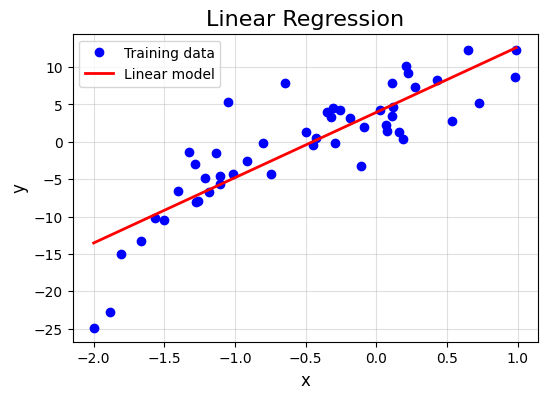

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv('/content/drive/MyDrive/data0405.csv',usecols=['x']).values
y = pd.read_csv('/content/drive/MyDrive/data0405.csv',usecols=['y']).values

# 데이터 (예시 또는 CSV로 불러온 x, y)
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

# 디자인 행렬 (1차)
A = np.hstack([x**0, x])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print(w)

# 학습 데이터
plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

# 선형모델 plotting (최소제곱법)
xp = np.arange(-2.0, 1.0, 0.01).reshape(-1,1)
yp = w[0,0] + w[1,0]*xp
#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()


[[ 5.03906362]
 [ 5.27924916]
 [-3.31676315]]


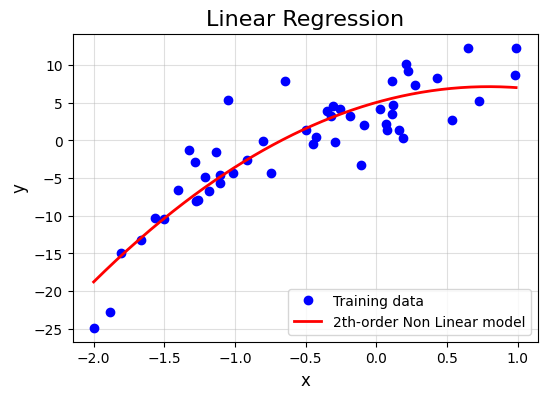

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv('/content/drive/MyDrive/data0405.csv',usecols=['x']).values
y = pd.read_csv('/content/drive/MyDrive/data0405.csv',usecols=['y']).values

# 데이터 (예시 또는 CSV로 불러온 x, y)
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

# 디자인 행렬 (1차)
A = np.hstack([x**0, x, x**2])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print(w)

# 학습 데이터
plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

# 선형모델 plotting (최소제곱법)
xp = np.arange(-2.0, 1.0, 0.01).reshape(-1,1)
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2
#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "2th-order Non Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()


[[  2.70561069]
 [  8.7466361 ]
 [ 24.11081469]
 [ -7.17740071]
 [-70.59489961]
 [-20.12073822]
 [ 59.53548381]
 [ 36.49128236]
 [ -8.88620274]
 [-11.06845324]
 [ -2.15841396]]


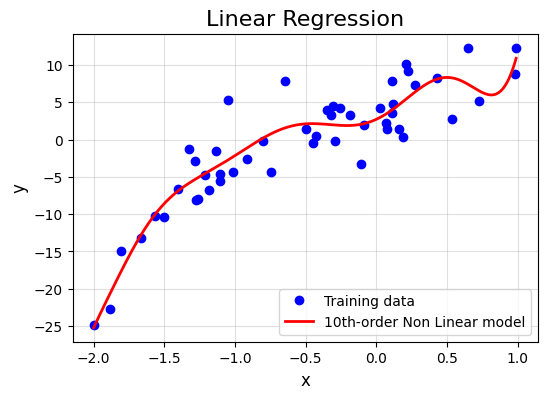

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv('/content/drive/MyDrive/data0405.csv',usecols=['x']).values
y = pd.read_csv('/content/drive/MyDrive/data0405.csv',usecols=['y']).values

# 데이터 (예시 또는 CSV로 불러온 x, y)
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

# 디자인 행렬 (1차)
A = np.hstack([x**0, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print(w)

# 학습 데이터
plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

# 선형모델 plotting (최소제곱법)
xp = np.arange(-2.0, 1.0, 0.01).reshape(-1,1)
yp = (w[0,0] + w[1,0]*xp + w[2,0]*xp**2 + w[3,0]*xp**3 + w[4,0]*xp**4
+ w[5,0]*xp**5 + w[6,0]*xp**6 + w[7,0]*xp**7 + w[8,0]*xp**8
+ w[9,0]*xp**9 + w[10,0]*xp**10)
#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "10th-order Non Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

[0.06825886] [2.23603262]


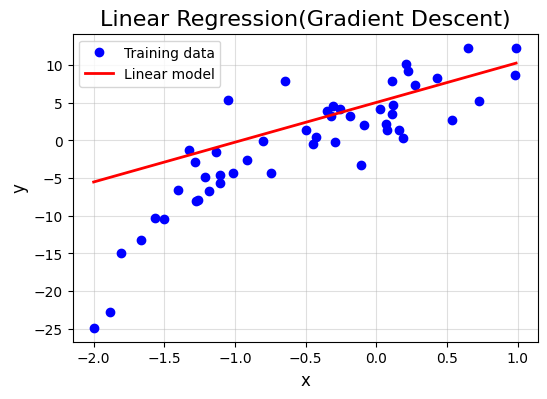

In [101]:
# Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

x = pd.read_csv('/content/drive/MyDrive/data0405.csv',usecols=['x']).values
y = pd.read_csv('/content/drive/MyDrive/data0405.csv',usecols=['y']).values

# 데이터 (예시 또는 CSV로 불러온 x, y)
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

# m = y.shape[0]
# np.hstack([np.ones([m,1]), x])
A = np.hstack([x**0, x])  # data x의 앞에 1을 horizontal 방향으로 추가
A = np.asmatrix(A)
# print('A :\n', A)

w1 = 0       # 기울기
w0 = 0       # 절편

lrate = 0.001  # 학습률(Learning rate) --> α
epochs = 500  # 반복 횟수

n = float(len(x)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs):
    yp = w1*x + w0  		          	# 선형 회귀 예측값
    dw1 = (1/n) * sum(x * (yp-y)) 	# 넘파이 배열간의 산술 계산은 요소별로 적용
    dw0 = (1/n) * sum(yp-y)  	      # sum()은 모든 요소들의 합을 계산하는 내장 함수
    w1 = w1 - lrate * dw1           # 기울기 update
    w0 = w0 - lrate * dw0  		      # 절편 update
print (w0, w1)

# 학습 데이터 그래프
plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent)', fontsize = 16)
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

xp = np.arange(-2.0, 1.0, 0.01).reshape(-1, 1)
yp = w[0,0] + w[1,0]*xp  # 예측값을 만든다.
#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

[[ 5.03916346]
 [ 5.2785808 ]
 [-3.31725603]]


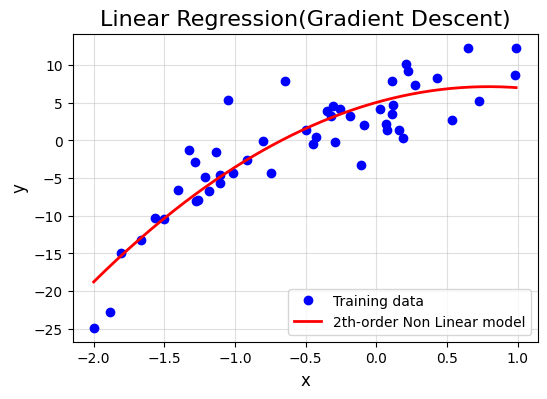

In [108]:
# Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

x = pd.read_csv('/content/drive/MyDrive/data0405.csv',usecols=['x']).values
y = pd.read_csv('/content/drive/MyDrive/data0405.csv',usecols=['y']).values

# 데이터 (예시 또는 CSV로 불러온 x, y)
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

# m = y.shape[0]
# np.hstack([np.ones([m,1]), x])
A = np.hstack([x**0, x, x**2])  # data x의 앞에 1을 horizontal 방향으로 추가
A = np.asmatrix(A)
# print('A :\n', A)

w = ([[0],[0],[0]])
lrate = 0.001  # 학습률(Learning rate) --> α
epochs = 500  # 반복 횟수

n = float(len(x)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs):
   dJ = 2 * (A.T @ A @ w - A.T @ y)
   w = w - lrate * dJ

print(w)

# 학습 데이터 그래프
plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent)', fontsize = 16)
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

xp = np.arange(-2.0, 1.0, 0.01).reshape(-1, 1)
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2  # 예측값을 만든다.
#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "2th-order Non Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

[[ 8.43161911e+23]
 [-1.25888267e+24]
 [ 2.08277519e+24]
 [-3.51407748e+24]
 [ 6.17021795e+24]]


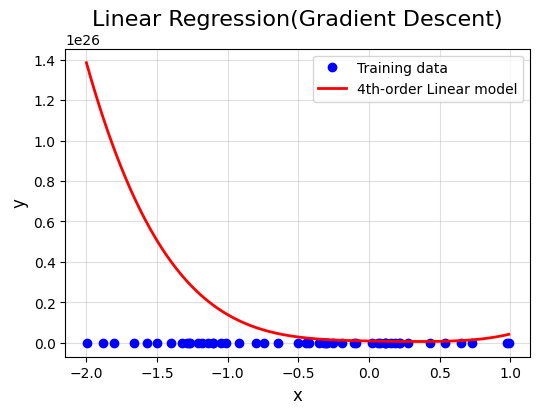

In [104]:
# Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

x = pd.read_csv('/content/drive/MyDrive/data0405.csv',usecols=['x']).values
y = pd.read_csv('/content/drive/MyDrive/data0405.csv',usecols=['y']).values

# 데이터 (예시 또는 CSV로 불러온 x, y)
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

# m = y.shape[0]
# np.hstack([np.ones([m,1]), x])
A = np.hstack([x**0, x, x**2, x**3, x**4])  # data x의 앞에 1을 horizontal 방향으로 추가
A = np.asmatrix(A)
# print('A :\n', A)

w = ([[0],[0],[0],[0],[0]])
lrate = 0.001  # 학습률(Learning rate) --> α
epochs = 500   # 반복 횟수

n = float(len(x)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs):
  dJ = 2 * (A.T @ A @ w - A.T @ y)
  w = w - lrate * dJ

print (w)

# 학습 데이터 그래프
plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent)', fontsize = 16)
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

xp = np.arange(-2.0, 1.0, 0.01).reshape(-1, 1)
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2 + w[3, 0]*xp**3 + w[4, 0]*xp**4.
#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "4th-order Non Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

[[ 3.55242938]
 [ 2.83675336]
 [ 0.55522403]
 [ 2.38973336]
 [-0.36598114]]


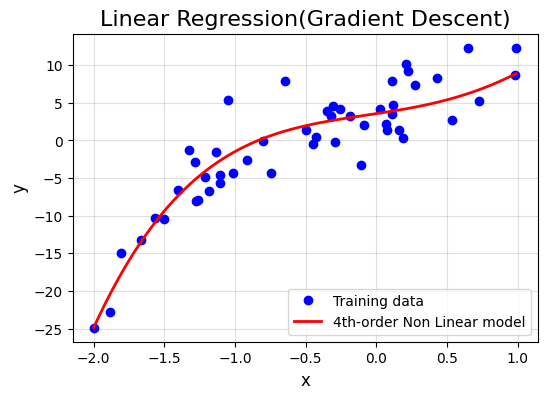

In [107]:
# Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

x = pd.read_csv('/content/drive/MyDrive/data0405.csv',usecols=['x']).values
y = pd.read_csv('/content/drive/MyDrive/data0405.csv',usecols=['y']).values

# 데이터 (예시 또는 CSV로 불러온 x, y)
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

# m = y.shape[0]
# np.hstack([np.ones([m,1]), x])
A = np.hstack([x**0, x, x**2, x**3, x**4])  # data x의 앞에 1을 horizontal 방향으로 추가
A = np.asmatrix(A)
# print('A :\n', A)

w = ([[0],[0],[0],[0],[0]])
lrate = 0.0001  # 학습률(Learning rate) --> α
epochs = 500   # 반복 횟수

n = float(len(x)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs):
  dJ = 2 * (A.T @ A @ w - A.T @ y)
  w = w - lrate * dJ

print (w)

# 학습 데이터 그래프
plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent)', fontsize = 16)
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

xp = np.arange(-2.0, 1.0, 0.01).reshape(-1, 1)
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2 + w[3, 0]*xp**3 + w[4, 0]*xp**4.
#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "4th-order Non Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

# 차이점
최소제곱법은 정규방정식을 이용한 해석적 방법으로, 주어진 데이터를 기반으로 수학적으로 한 번에 정확한 파라미터 값을 계산해낸다.
이 방법은 (A.T*A).I*A.T*y라는 공식에 따라 선형대수 계산을 수행하며, 계산 결과는 데이터와 수식에 따라 항상 일정하게 결정된다.
따라서 충분한 계산 정확도와 적절한 데이터가 주어졌을 때, 매우 안정적이고 신속하게 최적의 파라미터를 구할 수 있다는 장점이 있다.
반면 경사하강법은 초기 가중치를 설정하고, 손실 함수의 기울기 방향으로 조금씩 파라미터를 업데이트하면서 최적값에 점진적으로 수렴하는 수치적 방법이다.
이 과정은 학습률과 반복 횟수 등의 설정에 민감하며, 설정이 적절하지 않으면 수렴 속도가 느려지거나 최적값에 도달하지 못할 수 있다.
이론적으로는 최소제곱법이 정확한 해를 구하는 반면, 경사하강법은 반복 횟수가 충분하지 않거나 학습률이 부적절할 경우 근사적인 해에 그칠 수 있다.
실제로 동일한 데이터에 대해 두 방법으로 파라미터를 구해보면, 값 자체가 약간 다르게 나타나는 경우가 있다.
예를 들어 최소제곱법으로 구한 파라미터가 [3.94, 8.73]이라면, 경사하강법은 [3.90, 8.70]처럼 약간의 오차가 포함된 결과를 낼 수 있다.
이는 경사하강법이 수치적 반복 계산을 통해 점진적으로 수렴하는 특성상, 특정 에폭(epoch)에서 아직 정확한 값에 도달하지 않았기 때문이다.
따라서 두 방법 모두 유효하지만, 최소제곱법은 계산량이 크지 않은 상황에서는 더 정확하고 빠른 결과를 제공하고
경사하강법은 데이터가 매우 많거나 고차 다항식 모델처럼 정규방정식이 불안정할 수 있는 경우에 더 적합한 방법이라 할 수 있다.
결론적으로 계산 방식의 차이로 인해 파라미터 값에 약간의 차이가 발생할 수 있으며, 이 차이는 반복 횟수, 학습률, 데이터의 스케일 등에 따라 달라질 수 있다.

선형 예측 모델
<br>
<br>
>최소제곱법
<br>
>><br>w0 = [3.94188011]
<br>
w1 = [8.73592461]
<br>
<br>

>경사하강법
<br>
>><br>w0 = [0.06825886]
<br>
w1 = [2.23603262]
<br>
<br>

2차 예측 모델
<br>
<br>
>최소제곱법
<br>
>><br>w0 = [ 5.03906362]
<br>
w1 = [ 5.27924916]
<br>
w2 = [-3.31676315]
<br>
<br>

>경사하강법
<br>
>><br> w0 = [ 5.03916346]
<br> w1 = [ 5.2785808 ]
<br> w2 = [-3.31725603]
<br>
<br>

>10차 최소제곱법을 이용한 비선형 모델의 파라미터
>><br>w0 = [  2.70561083]
<br>
w1 = [  8.7466358 ]
<br>
w2 = [ 24.11081425]
<br>
w3 = [ -7.17740036]
<br>
w4 = [-70.59489886]
<br>
w5 = [-20.12073852]
<br>
w6 = [ 59.53548267]
<br>
w7 = [ 36.49128205]
<br>
w8 = [ -8.88620221]
<br>
w9 = [-11.06845286]
<br>
w10 = [ -2.15841389]
<br>
<br>

>4차 경사하강법을 이용한 비선형 모델의 파라미터
<br> 학습률을 0.001로 하면 학습이 제대로 이루어지지 않아 0.0001로 바꾼결과의 파라미터이다.
>><br>w0 = [ 3.55242938]
<br>
w1 = [ 2.83675336]
<br>
w2 = [ 0.55522403]
<br>
w3 = [ 2.38973336]
<br>
w4 = [-0.36598114]
<br>
<br>